In [103]:
import pandas as pd
import numpy as np
import pydicom
import os
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [96]:
% load_ext autoreload

In [97]:
% autoreload 2

In [93]:
% matplotlib inline

In [1]:
from fastai import *

In [6]:
from pathlib import Path

In [64]:
ddir = "/home/edwin/Datasets/competitions/rsna-pneumonia-detection-challenge"

In [23]:
! ls {ddir}

GCP%20Credits%20Request%20Link%20-%20RSNA.txt  stage_1_train_images.zip
sample					       stage_1_train_labels.csv
stage_1_detailed_class_info.csv		       stage_1_train_labels.csv.zip
stage_1_detailed_class_info.csv.zip	       test
stage_1_sample_submission.csv		       train
stage_1_test_images.zip


In [65]:
rsna_path = Path(ddir)

In [31]:
detailed_class_info_csv = pd.read_csv(rsna_path/'stage_1_detailed_class_info.csv'); detailed_class_info_csv

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
5,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
6,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,No Lung Opacity / Not Normal
8,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity
9,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity


In [33]:
stage_1_sample_submission_csv = pd.read_csv(rsna_path/'stage_1_sample_submission.csv'); stage_1_sample_submission_csv

,patientId,PredictionString
0,000924cf-0f8d-42bd-9158-1af53881a557,0.5 0 0 100 100
1,000db696-cf54-4385-b10b-6b16fbb3f985,0.5 0 0 100 100
2,000fe35a-2649-43d4-b027-e67796d412e0,0.5 0 0 100 100
3,001031d9-f904-4a23-b3e5-2c088acd19c6,0.5 0 0 100 100
4,0010f549-b242-4e94-87a8-57d79de215fc,0.5 0 0 100 100
5,001916b8-3d30-4935-a5d1-8eaddb1646cd,0.5 0 0 100 100
6,0022073f-cec8-42ec-ab5f-bc2314649235,0.5 0 0 100 100
7,0022995a-45eb-4cfa-9a59-cd15f5196c64,0.5 0 0 100 100
8,0025d2de-bd78-4d36-9f72-e15a5e22ca82,0.5 0 0 100 100
9,00293de0-a530-41dc-9621-0b3def01d06d,0.5 0 0 100 100


In [35]:
stage_1_train_labels_csv = pd.read_csv(rsna_path/'stage_1_train_labels.csv'); stage_1_train_labels_csv

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
6,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1


In [69]:
train_images = list((rsna_path/'train/').glob('*.dcm'))

In [73]:
dir(dicom)

['DataElement',
 'Dataset',
 'FileDataset',
 'Sequence',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '__version_info__',
 '_dicom_dict',
 '_private_dict',
 '_uid_dict',
 '_version',
 'charset',
 'compat',
 'config',
 'datadict',
 'dataelem',
 'dataset',
 'dcmread',
 'dcmwrite',
 'dicomdir',
 'encaps',
 'errors',
 'filebase',
 'filereader',
 'fileutil',
 'filewriter',
 'misc',
 'multival',
 'pixel_data_handlers',
 'read_file',
 'sequence',
 'tag',
 'uid',
 'util',
 'valuerep',
 'values',
 'write_file']

In [81]:
# First step to open dcm files

In [79]:
ds = pydicom.dcmread(str(train_images[0])); ds

(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.17640.1517874405.273825
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time                          TM: '000000.00'
(0008, 0050) Accession Number                    SH: ''
(0008, 0060) Modality                            CS: 'CR'
(0008, 0064) Conversion Type                     CS: 'WSD'
(0008, 0090) Referring Physician's Name          PN: ''
(0008, 103e) Series Description                  LO: 'view: PA'
(0010, 0010) Patient's Name                      PN: 'b215a2cf-ddf6-4032-99a0-1c2b10ef2f9e'
(0010, 0020) Patient ID                          LO: 'b215a2cf-ddf6-4032-99a0-1c2b10ef2f9e'
(0010, 0030) Patient's Birth Date                DA: ''
(0010, 0040) Patient's Sex                       CS: 'F'
(0010, 1010) Patient'

In [83]:
dir(ds)

['AccessionNumber',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'Columns',
 'ConversionType',
 'HighBit',
 'InstanceNumber',
 'LossyImageCompression',
 'LossyImageCompressionMethod',
 'Modality',
 'PatientAge',
 'PatientBirthDate',
 'PatientID',
 'PatientName',
 'PatientOrientation',
 'PatientSex',
 'PhotometricInterpretation',
 'PixelData',
 'PixelRepresentation',
 'PixelSpacing',
 'ReferringPhysicianName',
 'Rows',
 'SOPClassUID',
 'SOPInstanceUID',
 'SamplesPerPixel',
 'SeriesDescription',
 'SeriesInstanceUID',
 'SeriesNumber',
 'SpecificCharacterSet',
 'StudyDate',
 'StudyID',
 'StudyInstanceUID',
 'StudyTime',
 'ViewPosition',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setat

In [89]:
ds.PatientAge

'55'

In [91]:
ds.pixel_array

array([[177,  56,  38, ...,  18,  18,  18],
       [ 97,  41,  37, ...,  21,  21,  21],
       [ 42,  35,  28, ...,  22,  22,  22],
       ..., 
       [185, 176, 169, ...,  16,  16,  16],
       [191, 183, 175, ...,  16,  16,  16],
       [197, 188, 181, ...,  16,  16,  17]], dtype=uint8)

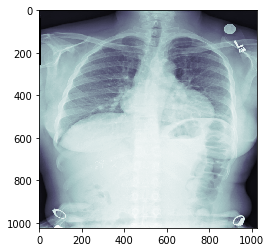

In [98]:
plt.imshow(ds.pixel_array, cmap=plt.cm.bone)

'b215a2cf-ddf6-4032-99a0-1c2b10ef2f9e'

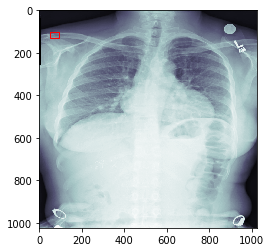

In [110]:
# Show a Bounding Box
fig, ax = plt.subplots(1)
ax.imshow(ds.pixel_array, cmap=plt.cm.bone)
rect = Rectangle((50,100),40,30,linewidth=1,edgecolor='r',facecolor='none')
ax.add_patch(rect)
ds.PatientID

In [111]:
stage_1_train_labels_csv

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
6,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1


In [113]:
stage_1_train_labels_csv[stage_1_train_labels_csv['patientId'] == 'b215a2cf-ddf6-4032-99a0-1c2b10ef2f9e']

,patientId,x,y,width,height,Target
19064,b215a2cf-ddf6-4032-99a0-1c2b10ef2f9e,NaN,NaN,NaN,NaN,0


In [128]:
def get_ds_file(file):
    ds = pydicom.dcmread(str(file))
    return {
        'file': str(file).split('/')[-1].split('.dcm')[0],
        'ds': ds
    }

In [143]:
train_images_map = list(map(get_ds_file, train_images))

In [148]:
def find_by_id(id):
    return list(filter(lambda x: x['file'] == id, train_images_map))

In [153]:
find_by_id('b215a2cf-ddf6-4032-99a0-1c2b10ef2f9e')[0]['ds'].pixel_array

array([[177,  56,  38, ...,  18,  18,  18],
       [ 97,  41,  37, ...,  21,  21,  21],
       [ 42,  35,  28, ...,  22,  22,  22],
       ..., 
       [185, 176, 169, ...,  16,  16,  16],
       [191, 183, 175, ...,  16,  16,  16],
       [197, 188, 181, ...,  16,  16,  17]], dtype=uint8)

In [181]:
def show_img_by_id(id):
    pixel_array = find_by_id(id)[0]['ds'].pixel_array
    fig, ax = plt.subplots(1)
    ax.imshow(ds.pixel_array, cmap=plt.cm.bone)
    
    _, x, y, width, height, _  = select_by_id(id).iloc[0]
    rect = Rectangle((x,y),width,height,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)

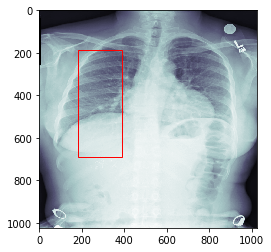

In [182]:
show_img_by_id('00f08de1-517e-4652-a04f-d1dc9ee48593')

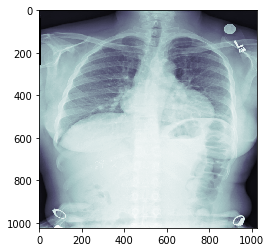

In [183]:
show_img_by_id('fffec09e-8a4a-48b1-b33e-ab4890ccd136')

In [ ]:
show_i

In [158]:
def select_by_id(id):
    return stage_1_train_labels_csv[stage_1_train_labels_csv['patientId'] == id]